In [1]:
#import the libraries
from Bio import SeqIO
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re, ast

Using TensorFlow backend.


In [2]:
#Load the data
NP_list=[]
X=pd.read_csv('/Users/urmis/Documents/Thesis/Glutarilation/train_Binary_Encoding.csv').Image_Array
Y=pd.read_csv('/Users/urmis/Documents/Thesis/Glutarilation/train_Binary_Encoding.csv').Acetylation
y_train=np.array(Y)
print(y_train[0])
for i in X:
    NP=np.array(ast.literal_eval(i))
    NP_list.append(NP)
print(NP_list[0])
X_train=np.array(NP_list)

0
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 

In [3]:
#Load the test data
np_list=[]
x=pd.read_csv('/Users/urmis/Documents/Thesis/Glutarilation/test_Binary_Encoding.csv').Image_Array
y=pd.read_csv('/Users/urmis/Documents/Thesis/Glutarilation/test_Binary_Encoding.csv').Acetylation
y_test=np.array(y)
print(y_test[0])
for i in x:
    npp=np.array(ast.literal_eval(i))
    np_list.append(npp)
print(np_list[0])
X_test=np.array(np_list)

0
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 

In [4]:
# #split data into train and test sets
# X_train,X_val,y_train,y_val=train_test_split(image,level,validation_split=0.2,random_state=20)
print(len(X_train))
print(len(X_test))

4088
484


In [5]:
X_train[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [6]:
y_train[0]

0

In [8]:
#Reshape the data to fit the model
X_train = X_train.reshape(4088,35,21,1)
X_test = X_test.reshape(484,35,21,1)

In [9]:
#One-Hot Encode target column (Y-Data sets) : Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_test_one_hot)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 

In [10]:
#Build the CNN model
model = Sequential()

W0127 00:44:40.078659 11204 deprecation_wrapper.py:119] From C:\Users\urmis\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [11]:
# add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(35,21,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

W0127 00:44:42.377863 11204 deprecation_wrapper.py:119] From C:\Users\urmis\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0127 00:44:42.384858 11204 deprecation_wrapper.py:119] From C:\Users\urmis\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [12]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0127 00:44:48.966404 11204 deprecation_wrapper.py:119] From C:\Users\urmis\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0127 00:44:49.032378 11204 deprecation_wrapper.py:119] From C:\Users\urmis\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
#Train the model
#Batch: Total number of training examples present in a single batch (None = default 32)
#Epoch:The number of iterations when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
#Fit: Another word for train
hist = model.fit(X_train, y_train_one_hot, validation_split=0.20, epochs=10)

W0127 00:44:55.929486 11204 deprecation.py:323] From C:\Users\urmis\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0127 00:44:56.042434 11204 deprecation_wrapper.py:119] From C:\Users\urmis\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3270 samples, validate on 818 samples
Epoch 1/10
3270/3270 [==============================] - 8s 2ms/step - loss: 0.4312 - acc: 0.8502 - val_loss: 0.4074 - val_acc: 0.8594
Epoch 2/10
3270/3270 [==============================] - 6s 2ms/step - loss: 0.4094 - acc: 0.8547 - val_loss: 0.4097 - val_acc: 0.8594
Epoch 3/10
3270/3270 [==============================] - 6s 2ms/step - loss: 0.3782 - acc: 0.8544 - val_loss: 0.4104 - val_acc: 0.8594
Epoch 4/10
3270/3270 [==============================] - 6s 2ms/step - loss: 0.3504 - acc: 0.8630 - val_loss: 0.4473 - val_acc: 0.8594
Epoch 5/10
3270/3270 [==============================] - 6s 2ms/step - loss: 0.3252 - acc: 0.8673 - val_loss: 0.4778 - val_acc: 0.8521
Epoch 6/10
3270/3270 [==============================] - 6s 2ms/step - loss: 0.2957 - acc: 0.8783 - val_loss: 0.4775 - val_acc: 0.8203
Epoch 7/10
3270/3270 [==============================] - 6s 2ms/step - loss: 0.2560 - acc: 0.9000 - val_loss: 0.5972 - val_acc: 0.8496
Epoch 8/10
3270

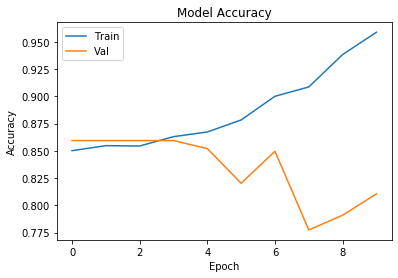

In [14]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [15]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = model.predict(X_test[:4])
predictions

array([[9.9962759e-01, 3.7237149e-04],
       [9.9999833e-01, 1.6762364e-06],
       [9.9887508e-01, 1.1248892e-03],
       [9.9963331e-01, 3.6664458e-04]], dtype=float32)

In [16]:
#Print our predicitons as number labels for the first 4 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(y_test[:4])

[0 0 0 0]
[0 0 0 1]


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 33, 19, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 17, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 15, 16)        4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 6960)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 13922     
Total params: 37,650
Trainable params: 37,650
Non-trainable params: 0
_________________________________________________________________


In [18]:
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train_one_hot)
print(f'Test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

4088/4088 [==============================] - 2s 603us/step
Test results - Loss: 0.21330169478609953 - Accuracy: 95.22994130324945%
